In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,ZWE,Africa,Zimbabwe,06/10/2021,131434.0,229.0,135.571,4630.0,3.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122631,ZWE,Africa,Zimbabwe,07/10/2021,131523.0,89.0,100.429,4631.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122632,ZWE,Africa,Zimbabwe,08/10/2021,131705.0,182.0,96.714,4634.0,3.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122633,ZWE,Africa,Zimbabwe,09/10/2021,131762.0,57.0,95.429,4636.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [9]:
### Feeling all the missing values----->

df.loc[(df.new_cases_smoothed.isnull()),'new_cases_smoothed']=80
df.loc[(df.continent.isnull()),'continent']=50
df.loc[(df.total_cases.isnull()),'total_cases']=90
df.loc[(df.excess_mortality_cumulative_absolute.isnull()),'excess_mortality_cumulative_absolute']=50
df.loc[(df.excess_mortality_cumulative.isnull()),'excess_mortality_cumulative']=50
df.loc[(df.excess_mortality.isnull()),'excess_mortality']=50
df.loc[(df.excess_mortality_cumulative_per_million.isnull()),'excess_mortality_cumulative_per_million']=50
df.loc[(df.human_development_index.isnull()),'human_development_index']=50
df.loc[(df.female_smokers.isnull()),'female_smokers']=50

df = df.fillna({'total_deaths': df['total_deaths'].min()})
df = df.fillna({'new_deaths': df['new_deaths'].mean()})
df = df.fillna({'new_deaths_smoothed': df['new_deaths_smoothed'].mean()})
df = df.fillna({'male_smokers': df['male_smokers'].mean()})

In [8]:
###   After data cleaning
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,80.000,1.0,144.668216,132.021672,...,50.0,32.740154,37.746,0.5,64.83,0.511,50.0,50.0,50.0,50.0
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,80.000,1.0,144.668216,132.021672,...,50.0,32.740154,37.746,0.5,64.83,0.511,50.0,50.0,50.0,50.0
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,80.000,1.0,144.668216,132.021672,...,50.0,32.740154,37.746,0.5,64.83,0.511,50.0,50.0,50.0,50.0
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,80.000,1.0,144.668216,132.021672,...,50.0,32.740154,37.746,0.5,64.83,0.511,50.0,50.0,50.0,50.0
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,80.000,1.0,144.668216,132.021672,...,50.0,32.740154,37.746,0.5,64.83,0.511,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,ZWE,Africa,Zimbabwe,06/10/2021,131434.0,229.0,135.571,4630.0,3.000000,2.000000,...,1.6,30.700000,36.791,1.7,61.49,0.571,50.0,50.0,50.0,50.0
122631,ZWE,Africa,Zimbabwe,07/10/2021,131523.0,89.0,100.429,4631.0,1.000000,1.143000,...,1.6,30.700000,36.791,1.7,61.49,0.571,50.0,50.0,50.0,50.0
122632,ZWE,Africa,Zimbabwe,08/10/2021,131705.0,182.0,96.714,4634.0,3.000000,1.429000,...,1.6,30.700000,36.791,1.7,61.49,0.571,50.0,50.0,50.0,50.0
122633,ZWE,Africa,Zimbabwe,09/10/2021,131762.0,57.0,95.429,4636.0,2.000000,1.571000,...,1.6,30.700000,36.791,1.7,61.49,0.571,50.0,50.0,50.0,50.0


In [10]:
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 65, dtype: int64

In [9]:
df[df.eq("Sierra Leone").any(1)].isnull().sum().any()

True

In [11]:
df[df.eq("Sierra Leone").any(1)].tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
98415,SLE,Africa,Sierra Leone,06/10/2021,6396.0,0.0,0.429,121.0,0.0,0.0,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
98416,SLE,Africa,Sierra Leone,07/10/2021,6396.0,0.0,0.286,121.0,0.0,0.0,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
98417,SLE,Africa,Sierra Leone,08/10/2021,6396.0,0.0,0.286,121.0,0.0,0.0,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
98418,SLE,Africa,Sierra Leone,09/10/2021,6396.0,0.0,0.286,121.0,0.0,0.0,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
98419,SLE,Africa,Sierra Leone,10/10/2021,6396.0,0.0,0.000,121.0,0.0,0.0,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0


In [12]:
df[df.eq("Sierra Leone").any(1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 97861 to 98419
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   iso_code                                 559 non-null    object 
 1   continent                                559 non-null    object 
 2   location                                 559 non-null    object 
 3   date                                     559 non-null    object 
 4   total_cases                              559 non-null    float64
 5   new_cases                                559 non-null    float64
 6   new_cases_smoothed                       559 non-null    float64
 7   total_deaths                             559 non-null    float64
 8   new_deaths                               559 non-null    float64
 9   new_deaths_smoothed                      559 non-null    float64
 10  total_cases_per_million                  559

In [13]:
df[df.eq("Sierra Leone").any(1)].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
97861,SLE,Africa,Sierra Leone,31/03/2020,1.0,1.0,80.0,1.0,144.668216,132.021672,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
97862,SLE,Africa,Sierra Leone,01/04/2020,2.0,1.0,80.0,1.0,144.668216,132.021672,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
97863,SLE,Africa,Sierra Leone,02/04/2020,2.0,0.0,80.0,1.0,144.668216,132.021672,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
97864,SLE,Africa,Sierra Leone,03/04/2020,2.0,0.0,80.0,1.0,144.668216,132.021672,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0
97865,SLE,Africa,Sierra Leone,04/04/2020,4.0,2.0,80.0,1.0,144.668216,132.021672,...,8.8,41.3,19.275,NaN,54.7,0.452,50.0,50.0,50.0,50.0


In [14]:
df.drop(['excess_mortality'],axis=1,inplace=True)

In [15]:
df.drop(['female_smokers'],axis=1,inplace=True)

In [16]:
df.drop(['excess_mortality_cumulative_per_million'],axis=1,inplace=True)

In [17]:
df.drop(['excess_mortality_cumulative'],axis=1,inplace=True)

In [19]:
df.drop(['new_cases_smoothed'],axis=1,inplace=True)

In [20]:
df.drop(['hospital_beds_per_thousand'],axis=1,inplace=True)

In [21]:
df[df.eq("Sierra Leone").any(1)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,male_smokers,handwashing_facilities,life_expectancy,human_development_index,excess_mortality_cumulative_absolute
97861,SLE,Africa,Sierra Leone,31/03/2020,1.0,1.0,1.0,144.668216,132.021672,0.123,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
97862,SLE,Africa,Sierra Leone,01/04/2020,2.0,1.0,1.0,144.668216,132.021672,0.246,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
97863,SLE,Africa,Sierra Leone,02/04/2020,2.0,0.0,1.0,144.668216,132.021672,0.246,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
97864,SLE,Africa,Sierra Leone,03/04/2020,2.0,0.0,1.0,144.668216,132.021672,0.246,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
97865,SLE,Africa,Sierra Leone,04/04/2020,4.0,2.0,1.0,144.668216,132.021672,0.491,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98415,SLE,Africa,Sierra Leone,06/10/2021,6396.0,0.0,121.0,0.000000,0.000000,785.620,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
98416,SLE,Africa,Sierra Leone,07/10/2021,6396.0,0.0,121.0,0.000000,0.000000,785.620,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
98417,SLE,Africa,Sierra Leone,08/10/2021,6396.0,0.0,121.0,0.000000,0.000000,785.620,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0
98418,SLE,Africa,Sierra Leone,09/10/2021,6396.0,0.0,121.0,0.000000,0.000000,785.620,...,1.285,1390.3,52.2,325.721,2.42,41.3,19.275,54.7,0.452,50.0


In [38]:
df[df.eq("Sierra Leone").any(1)].shape

(559, 58)

In [39]:
df[df.eq("Sierra Leone").any(1)].describe()

,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,male_smokers,handwashing_facilities,life_expectancy,excess_mortality_cumulative_absolute
count,559.000000,559.000000,536.000000,536.000000,554.000000,559.000000,559.000000,554.000000,536.000000,536.000000,...,5.590000e+02,5.590000e+02,5.590000e+02,5.590000e+02,5.590000e+02,5.590000e+02,5.590000e+02,5.590000e+02,5.590000e+02,0.0
mean,3213.239714,11.441860,78.399254,0.225746,0.218460,394.681787,1.405386,1.417736,9.629804,0.027748,...,2.538000e+00,1.285000e+00,1.390300e+03,5.220000e+01,3.257210e+02,2.420000e+00,4.130000e+01,1.927500e+01,5.470000e+01,NaN
std,1890.778672,18.714123,24.882173,0.677660,0.421416,232.244058,2.298634,1.889798,3.056211,0.083256,...,9.778713e-15,1.333461e-15,9.558248e-12,4.836018e-13,1.194781e-12,4.000383e-15,4.195957e-13,1.991302e-13,4.978254e-13,NaN
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.123000,0.000000,0.000000,0.123000,0.000000,...,2.538000e+00,1.285000e+00,1.390300e+03,5.220000e+01,3.257210e+02,2.420000e+00,4.130000e+01,1.927500e+01,5.470000e+01,NaN
25%,1957.500000,1.000000,71.000000,0.000000,0.000000,240.439500,0.123000,0.298000,8.721000,0.000000,...,2.538000e+00,1.285000e+00,1.390300e+03,5.220000e+01,3.257210e+02,2.420000e+00,4.130000e+01,1.927500e+01,5.470000e+01,NaN
50%,2673.000000,5.000000,77.000000,0.000000,0.000000,328.324000,0.614000,0.675500,9.458000,0.000000,...,2.538000e+00,1.285000e+00,1.390300e+03,5.220000e+01,3.257210e+02,2.420000e+00,4.130000e+01,1.927500e+01,5.470000e+01,NaN
75%,4121.000000,14.500000,79.000000,0.000000,0.286000,506.182000,1.781000,1.755000,9.704000,0.000000,...,2.538000e+00,1.285000e+00,1.390300e+03,5.220000e+01,3.257210e+02,2.420000e+00,4.130000e+01,1.927500e+01,5.470000e+01,NaN
max,6396.000000,192.000000,121.000000,7.000000,2.429000,785.620000,23.583000,10.914000,14.862000,0.860000,...,2.538000e+00,1.285000e+00,1.390300e+03,5.220000e+01,3.257210e+02,2.420000e+00,4.130000e+01,1.927500e+01,5.470000e+01,NaN


In [17]:
df[df.eq("Sierra Leone").any(1)].groupby(['total_cases'], as_index=False).size()

,total_cases,size
0,1.0,1
1,2.0,3
2,4.0,1
3,6.0,3
4,7.0,2
...,...,...
432,6391.0,1
433,6392.0,3
434,6393.0,9
435,6394.0,3


In [18]:
df[df.eq("Sierra Leone").any(1)].groupby(['total_deaths'], as_index=False).size()

,total_deaths,size
0,1.0,1
1,2.0,2
2,4.0,4
3,7.0,2
4,8.0,2
...,...,...
73,117.0,1
74,118.0,4
75,119.0,2
76,120.0,10


In [19]:
df[df.eq("Sierra Leone").any(1)].groupby(['new_deaths'], as_index=False).size()

,new_deaths,size
0,0.0,458
1,1.0,52
2,2.0,16
3,3.0,8
4,6.0,1
5,7.0,1


In [20]:
df[df.eq("Sierra Leone").any(1)].groupby(['life_expectancy'], as_index=False).size()

,life_expectancy,size
0,54.7,559


In [9]:
df[df.eq("Sierra Leone").any(1)].groupby(['population'], as_index=False).size()

,population,size
0,8141343.0,559


In [22]:
df[df.eq("Sierra Leone").any(1)].groupby(['total_deaths', 'total_cases', 'new_deaths', 'population','life_expectancy'],
                                         as_index=False).size().value_counts()

total_deaths  total_cases  new_deaths  population  life_expectancy  size
1.0           1.0          144.668216  8141343.0   54.7             1       1
79.0          3889.0       0.000000    8141343.0   54.7             1       1
              3938.0       0.000000    8141343.0   54.7             1       1
              3937.0       0.000000    8141343.0   54.7             2       1
              3934.0       0.000000    8141343.0   54.7             1       1
                                                                           ..
71.0          2041.0       0.000000    8141343.0   54.7             2       1
              2035.0       0.000000    8141343.0   54.7             1       1
              2029.0       0.000000    8141343.0   54.7             1       1
              2028.0       1.000000    8141343.0   54.7             1       1
121.0         6396.0       0.000000    8141343.0   54.7             8       1
Length: 446, dtype: int64

In [5]:
df[df.eq("Sierra Leone").any(1)].groupby(['total_deaths', 'total_cases', 'new_deaths', 'life_expectancy', 'population'],
                                         as_index=False).size()

,total_deaths,total_cases,new_deaths,life_expectancy,population,size
0,1.0,64.0,1.0,54.7,8141343.0,1
1,2.0,82.0,0.0,54.7,8141343.0,1
2,2.0,82.0,1.0,54.7,8141343.0,1
3,4.0,93.0,0.0,54.7,8141343.0,1
4,4.0,93.0,2.0,54.7,8141343.0,1
...,...,...,...,...,...,...
425,121.0,6391.0,0.0,54.7,8141343.0,1
426,121.0,6392.0,0.0,54.7,8141343.0,3
427,121.0,6393.0,0.0,54.7,8141343.0,9
428,121.0,6394.0,0.0,54.7,8141343.0,3


## DATA VISUALIZATION

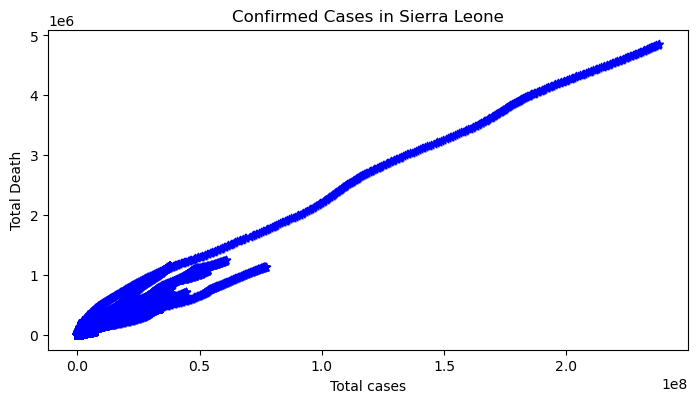

In [6]:

fig=plt.figure(figsize=(8,4),dpi=100)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(df['total_cases'],df['total_deaths'],color='blue',marker='*')
axes.set_xlabel("Total cases")
axes.set_ylabel("Total Death")
axes.set_title("Confirmed Cases in Sierra Leone")

plt.show()

<AxesSubplot:ylabel='Frequency'>

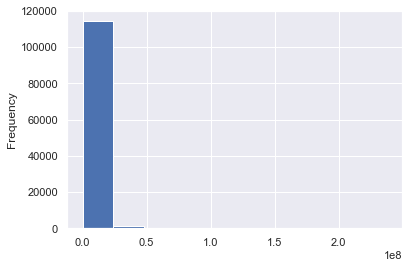

In [13]:

sns.set(color_codes=True)
df['total_deaths'].plot.hist()

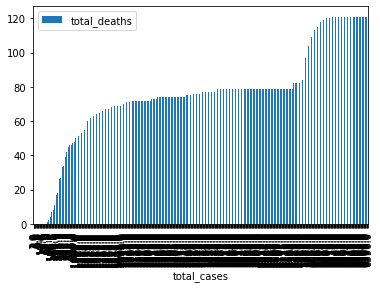

In [4]:
df[df.eq("Sierra Leone").any(1)].plot(kind='bar', x='total_cases', y='total_deaths')
plt.show()

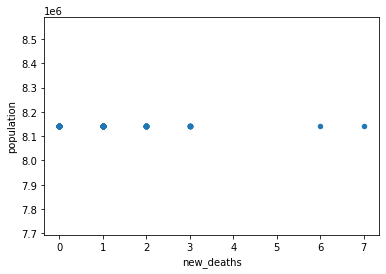

In [8]:
df[df.eq("Sierra Leone").any(1)].plot(kind='scatter', x='new_deaths', y='population')
plt.show()

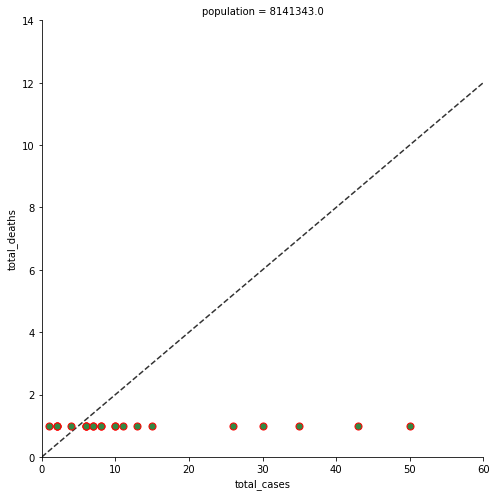

In [20]:
g = sns.FacetGrid(df[df.eq("Sierra Leone").any(1)], col="population", margin_titles=True, height=7)
g.map(plt.scatter, "total_cases", "total_deaths", color="#338844", edgecolor="red", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))